In [1]:
import pandas as pd
import numpy as np

import data
import util

In [2]:
daily = data.get_transit_daily()
# gets a smaller version for faster troubleshooting
daily = data.data_transforms(daily)

In [3]:
#daily.describe().transpose()

In [4]:
x = daily[data.USED_COLS]
x = pd.get_dummies(x)  # turns all categoricals into one hot encoded columns!
label = x.pop("label")

In [5]:
from sklearn.decomposition import PCA

pca = PCA(10)

In [7]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def train_svm(data, targets):
  regr = make_pipeline(StandardScaler(), LinearSVR())
  return regr.fit(data, targets)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x.values, label.values)

proj = pca.fit_transform(X_train)
test_proj = pca.transform(X_test)
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum of variance_ratio: ", np.sum(pca.explained_variance_ratio_))
print("shape of new data: ", proj.shape)

svm = train_svm(X_train, y_train)

variance ratio:  [9.97162359e-01 1.86420313e-03 7.89074757e-04 1.59643797e-04
 2.34811940e-05 1.08604872e-06 3.65294778e-08 2.48681612e-08
 1.48292956e-08 7.54016742e-09]
sum of variance_ratio:  0.9999999319194314
shape of new data:  (7407, 10)


TypeError: __init__() got an unexpected keyword argument 'gamma'

In [ ]:
def test_svm(svm, data):
  return svm.predict(data)

results = test_svm(svm,X_test)

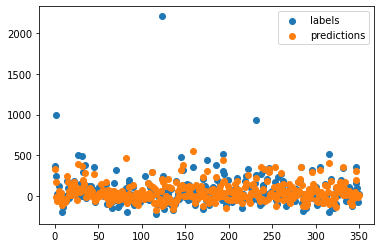

In [ ]:
util.plot(69,420,results,y_test)